# Лабораторная работа 2
Обработка пропусков в данных, кодирование категориальных признаков, масштабирование данных.


Цель лабораторной работы: изучение способов предварительной обработки данных для дальнейшего формирования моделей.


Задание:
Выбрать набор данных (датасет), содержащий категориальные признаки и пропуски в данных. Для выполнения следующих пунктов можно использовать несколько различных наборов данных (один для обработки пропусков, другой для категориальных признаков и т.д.)
Для выбранного датасета (датасетов) на основе материалов лекции решить следующие задачи:
обработку пропусков в данных;
кодирование категориальных признаков;
масштабирование данных.

In [150]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

In [151]:
data = pd.read_csv('./crimes.csv', sep=",")

In [152]:
# размер набора данных
data.shape

(285807, 12)

In [153]:
# типы колонок
data.dtypes

CrimeDate           object
CrimeTime           object
CrimeCode           object
Location            object
Description         object
Inside/Outside      object
Weapon              object
Post               float64
District            object
Neighborhood        object
Location 1          object
Total Incidents      int64
dtype: object

In [154]:
# проверим есть ли пропущенные значения
data.isnull().sum()

CrimeDate               0
CrimeTime               0
CrimeCode               0
Location             1623
Description             0
Inside/Outside       4196
Weapon             188411
Post                  191
District               58
Neighborhood         1701
Location 1           1619
Total Incidents         0
dtype: int64

In [155]:
# Первые 5 строк датасета
data.head()

,CrimeDate,CrimeTime,CrimeCode,Location,Description,Inside/Outside,Weapon,Post,District,Neighborhood,Location 1,Total Incidents
0,11/12/2016,02:35:00,3B,300 SAINT PAUL PL,ROBBERY - STREET,O,NaN,111.0,CENTRAL,Downtown,"(39.2924100000, -76.6140800000)",1
1,11/12/2016,02:56:00,3CF,800 S BROADWAY,ROBBERY - COMMERCIAL,I,FIREARM,213.0,SOUTHEASTERN,Fells Point,"(39.2824200000, -76.5928800000)",1
2,11/12/2016,03:00:00,6D,1500 PENTWOOD RD,LARCENY FROM AUTO,O,NaN,413.0,NORTHEASTERN,Stonewood-Pentwood-Winston,"(39.3480500000, -76.5883400000)",1
3,11/12/2016,03:00:00,6D,6600 MILTON LN,LARCENY FROM AUTO,O,NaN,424.0,NORTHEASTERN,Westfield,"(39.3626300000, -76.5516100000)",1
4,11/12/2016,03:00:00,6E,300 W BALTIMORE ST,LARCENY,O,NaN,111.0,CENTRAL,Downtown,"(39.2893800000, -76.6197100000)",1


In [156]:
total_count = data.shape[0]
print('Всего строк: {}'.format(total_count))

Всего строк: 285807


## Обработка пропусков в данных

### Простые стратегии - удаление или заполнение нулями

In [157]:
# Удаление колонок, содержащих пустые значения
data_new_1 = data.dropna(axis=1, how='any')
(data.shape, data_new_1.shape)

((285807, 12), (285807, 5))

In [158]:
data_new_1.head()

,CrimeDate,CrimeTime,CrimeCode,Description,Total Incidents
0,11/12/2016,02:35:00,3B,ROBBERY - STREET,1
1,11/12/2016,02:56:00,3CF,ROBBERY - COMMERCIAL,1
2,11/12/2016,03:00:00,6D,LARCENY FROM AUTO,1
3,11/12/2016,03:00:00,6D,LARCENY FROM AUTO,1
4,11/12/2016,03:00:00,6E,LARCENY,1


In [159]:
# Удаление строк, содержащих пустые значения
data_new_2 = data.dropna(axis=0, how='any')
(data.shape, data_new_2.shape)

((285807, 12), (95060, 12))

In [160]:
data_new_2.head()

,CrimeDate,CrimeTime,CrimeCode,Location,Description,Inside/Outside,Weapon,Post,District,Neighborhood,Location 1,Total Incidents
1,11/12/2016,02:56:00,3CF,800 S BROADWAY,ROBBERY - COMMERCIAL,I,FIREARM,213.0,SOUTHEASTERN,Fells Point,"(39.2824200000, -76.5928800000)",1
5,11/12/2016,03:00:00,4E,6900 MCCLEAN BLVD,COMMON ASSAULT,I,HANDS,423.0,NORTHEASTERN,Hamilton Hills,"(39.3707000000, -76.5670900000)",1
6,11/12/2016,03:45:00,3CO,1700 W LOMBARD ST,ROBBERY - COMMERCIAL,O,OTHER,933.0,SOUTHERN,Union Square,"(39.2862400000, -76.6445500000)",1
9,11/12/2016,08:00:00,4E,1200 LAURENS ST,COMMON ASSAULT,I,HANDS,743.0,WESTERN,Sandtown-Winchester,"(39.3034000000, -76.6384200000)",1
11,11/12/2016,09:40:00,4E,1600 N HILTON ST,COMMON ASSAULT,I,HANDS,813.0,SOUTHWESTERN,Rosemont,"(39.3058700000, -76.6721600000)",1


## "Внедрение значений" - импьютация (imputation)

In [161]:
# Выберем числовые колонки с пропущенными значениями
# Цикл по колонкам датасета
num_cols = []
for col in data.columns:
    # Количество пустых значений 
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='float64' or dt=='int64'):
        num_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка Post. Тип данных float64. Количество пустых значений 191, 0.07%.


In [162]:
# Фильтр по колонкам с пропущенными значениями
data_num = data[num_cols]
data_num

,Post
0,111.0
1,213.0
2,413.0
3,424.0
4,111.0
...,...
285802,423.0
285803,232.0
285804,721.0
285805,714.0


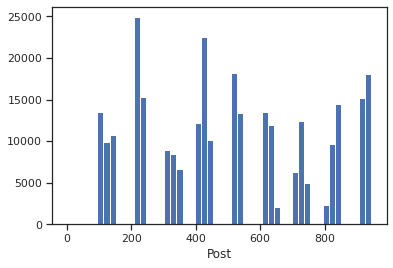

In [163]:
# Гистограмма по признакам
for col in data_num:
    plt.hist(data[col], 50)
    plt.xlabel(col)
    plt.show()

In [164]:
data_num_inspection_scores = data_num[['Post']]
data_num_inspection_scores.head()

,Post
0,111.0
1,213.0
2,413.0
3,424.0
4,111.0


In [165]:
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator

In [166]:
# Фильтр для проверки заполнения пустых значений
indicator = MissingIndicator()
mask_missing_values_only = indicator.fit_transform(data_num_inspection_scores)
mask_missing_values_only

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [167]:
strategies=['mean', 'median', 'most_frequent']

In [168]:
def test_num_impute(strategy_param):
    imp_num = SimpleImputer(strategy=strategy_param)
    data_num_imp = imp_num.fit_transform(data_num_inspection_scores)
    return data_num_imp[mask_missing_values_only]

In [169]:
strategies[0], test_num_impute(strategies[0])

('mean',
 array([504.23418436, 504.23418436, 504.23418436, 504.23418436,
        504.23418436, 504.23418436, 504.23418436, 504.23418436,
        504.23418436, 504.23418436, 504.23418436, 504.23418436,
        504.23418436, 504.23418436, 504.23418436, 504.23418436,
        504.23418436, 504.23418436, 504.23418436, 504.23418436,
        504.23418436, 504.23418436, 504.23418436, 504.23418436,
        504.23418436, 504.23418436, 504.23418436, 504.23418436,
        504.23418436, 504.23418436, 504.23418436, 504.23418436,
        504.23418436, 504.23418436, 504.23418436, 504.23418436,
        504.23418436, 504.23418436, 504.23418436, 504.23418436,
        504.23418436, 504.23418436, 504.23418436, 504.23418436,
        504.23418436, 504.23418436, 504.23418436, 504.23418436,
        504.23418436, 504.23418436, 504.23418436, 504.23418436,
        504.23418436, 504.23418436, 504.23418436, 504.23418436,
        504.23418436, 504.23418436, 504.23418436, 504.23418436,
        504.23418436, 504.23418

In [175]:
# Более сложная функция, которая позволяет задавать колонку и вид импьютации
def test_num_impute_col(dataset, column, strategy_param):
    temp_data = dataset[[column]]
    
    indicator = MissingIndicator()
    mask_missing_values_only = indicator.fit_transform(temp_data)
    
    imp_num = SimpleImputer(strategy=strategy_param)
    data_num_imp = imp_num.fit_transform(temp_data)
    
    filled_data = data_num_imp[mask_missing_values_only]
    
    return column, strategy_param, filled_data.size, filled_data[0], filled_data[filled_data.size-1]

In [176]:
data[['Post']].describe()

,Post
count,285616.000000
mean,504.234184
std,261.354783
min,0.000000
25%,242.000000
50%,445.000000
75%,723.000000
max,945.000000


In [177]:
test_num_impute_col(data, 'Post', strategies[0])

('Post', 'mean', 191, 504.23418435941966, 504.23418435941966)

### Обработка пропусков в категориальных данных

In [178]:
# Выберем категориальные колонки с пропущенными значениями
# Цикл по колонкам датасета
cat_cols = []
for col in data.columns:
    # Количество пустых значений 
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='object'):
        cat_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка Location. Тип данных object. Количество пустых значений 1623, 0.57%.
Колонка Inside/Outside. Тип данных object. Количество пустых значений 4196, 1.47%.
Колонка Weapon. Тип данных object. Количество пустых значений 188411, 65.92%.
Колонка District. Тип данных object. Количество пустых значений 58, 0.02%.
Колонка Neighborhood. Тип данных object. Количество пустых значений 1701, 0.6%.
Колонка Location 1. Тип данных object. Количество пустых значений 1619, 0.57%.


In [179]:
cat_temp_data = data[['Weapon']]
cat_temp_data.head()

,Weapon
0,NaN
1,FIREARM
2,NaN
3,NaN
4,NaN


In [180]:
cat_temp_data['Weapon'].unique()

array([nan, 'FIREARM', 'HANDS', 'OTHER', 'KNIFE'], dtype=object)

In [181]:
cat_temp_data[cat_temp_data['Weapon'].isnull()].shape

(188411, 1)

In [182]:
# Импьютация наиболее частыми значениями
imp2 = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
data_imp2 = imp2.fit_transform(cat_temp_data)
data_imp2

array([['HANDS'],
       ['FIREARM'],
       ['HANDS'],
       ...,
       ['HANDS'],
       ['HANDS'],
       ['HANDS']], dtype=object)

In [183]:
# Пустые значения отсутствуют
np.unique(data_imp2)

array(['FIREARM', 'HANDS', 'KNIFE', 'OTHER'], dtype=object)

In [184]:
# Импьютация константой
imp3 = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value='HANDS')
data_imp3 = imp3.fit_transform(cat_temp_data)
data_imp3

array([['HANDS'],
       ['FIREARM'],
       ['HANDS'],
       ...,
       ['HANDS'],
       ['HANDS'],
       ['HANDS']], dtype=object)

In [185]:
np.unique(data_imp3)

array(['FIREARM', 'HANDS', 'KNIFE', 'OTHER'], dtype=object)

In [186]:
data_imp3[data_imp3=='HANDS'].size

240102

## Преобразование категориальных признаков в числовые

In [187]:
cat_enc = pd.DataFrame({'c1':data_imp2.T[0]})
cat_enc

,c1
0,HANDS
1,FIREARM
2,HANDS
3,HANDS
4,HANDS
...,...
285802,HANDS
285803,HANDS
285804,HANDS
285805,HANDS


### Кодирование категорий целочисленными значениями (label encoding)


#### Использование LabelEncoder

In [188]:
from sklearn.preprocessing import LabelEncoder

In [189]:
cat_enc['c1'].unique()

array(['HANDS', 'FIREARM', 'OTHER', 'KNIFE'], dtype=object)

In [190]:
le = LabelEncoder()
cat_enc_le = le.fit_transform(cat_enc['c1'])

In [191]:
# Наименования категорий в соответствии с порядковыми номерами

# Свойство называется classes, потому что предполагается что мы решаем 
# задачу классификации и каждое значение категории соответствует 
# какому-либо классу целевого признака

le.classes_

array(['FIREARM', 'HANDS', 'KNIFE', 'OTHER'], dtype=object)

In [192]:
cat_enc_le

array([1, 0, 1, ..., 1, 1, 1])

In [193]:
np.unique(cat_enc_le)

array([0, 1, 2, 3])

#### Кодирование категорий наборами бинарных значений

In [194]:
from sklearn.preprocessing import OneHotEncoder

In [195]:
ohe = OneHotEncoder()
cat_enc_ohe = ohe.fit_transform(cat_enc[['c1']])

In [196]:
cat_enc.shape

(285807, 1)

In [197]:
cat_enc_ohe.shape

(285807, 4)

In [198]:
cat_enc_ohe.todense()[0:10]

matrix([[0., 1., 0., 0.],
        [1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [0., 1., 0., 0.],
        [0., 1., 0., 0.],
        [0., 1., 0., 0.],
        [0., 0., 0., 1.],
        [0., 1., 0., 0.],
        [0., 1., 0., 0.],
        [0., 1., 0., 0.]])

In [199]:
cat_enc.head(10)

,c1
0,HANDS
1,FIREARM
2,HANDS
3,HANDS
4,HANDS
5,HANDS
6,OTHER
7,HANDS
8,HANDS
9,HANDS


In [200]:
pd.get_dummies(cat_enc).head()

,c1_FIREARM,c1_HANDS,c1_KNIFE,c1_OTHER
0,0,1,0,0
1,1,0,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0


In [201]:
pd.get_dummies(cat_temp_data, dummy_na=True).head()

,Weapon_FIREARM,Weapon_HANDS,Weapon_KNIFE,Weapon_OTHER,Weapon_nan
0,0,0,0,0,1
1,1,0,0,0,0
2,0,0,0,0,1
3,0,0,0,0,1
4,0,0,0,0,1


## Масштабирование данных

In [202]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer

In [147]:
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(data[['Post']])

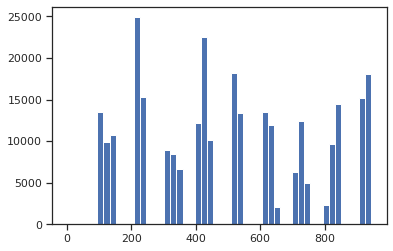

In [203]:
plt.hist(data['Post'], 50)
plt.show()

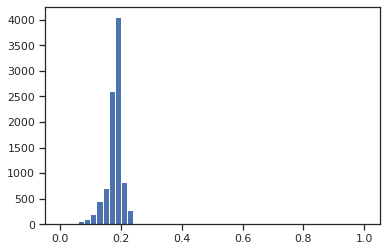

In [204]:
plt.hist(sc1_data, 50)
plt.show()